In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#load dataset
data = pd.read_csv('Online_Retail.csv')

This is a dataset for online orders placed at a retail business. The rows represent the transactions of every order being made. 

* Invoice No: The unique number assigned to this particular row/transaction
* StockCode: The code of the item purchased
* Description: The description of the item purchased
* Quantity: The quantity of the item purchased
* InvoiceDate: The Date on which the item was purchased
* UnitPrice: The price at which the item was purchased
* CustomerID: The ID of the customer which has made this transaction
* Country: The country in which this transactio took place

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#remove spaces from item list
data['Description'] = data['Description'].str.strip()
data.Description

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905            CHILDREN'S APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908           BAKING SET 9 PIECE RETROSPOT
Name: Description, Length: 541909, dtype: object

In [7]:
#remove empty invoice numbers and change type
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

In [8]:
#remove cancelled transactions
data = data[~data['InvoiceNo'].str.contains('C')]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
locations = data['Country'].value_counts()
locations[:10]

United Kingdom    487622
Germany             9042
France              8408
EIRE                7894
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1967
Portugal            1501
Australia           1185
Name: Country, dtype: int64

In [10]:
#selecting a specific country as case study
item_list = (data[data['Country'] == 'United Kingdom']
            .groupby(['InvoiceNo', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('InvoiceNo'))

* group the data by invoice# and description because "check data description on UCI'
* in the list, 0 means the items are not in that particular invoice, >0 reps the # of times the item was on the invoice 

In [11]:
item_list.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#creating a hot encode function that converts the item_list in the format of 0 and 1 fit for the model
def coded_item(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [13]:
#using the function
encoded_item_list = item_list.applymap(coded_item)
encoded_item_list

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#remove "postage" as an item
encoded_item_list.drop('POSTAGE', inplace = True, axis=1)

In [15]:
#generating frequent transactions
transactions = apriori(encoded_item_list, min_support= 0.02, use_colnames=True).sort_values('support',ascending=False)
transactions[:10]

C:\Users\Meena\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
265,0.116027,(WHITE HANGING HEART T-LIGHT HOLDER)
101,0.103814,(JUMBO BAG RED RETROSPOT)
191,0.090261,(REGENCY CAKESTAND 3 TIER)
154,0.085387,(PARTY BUNTING)
126,0.074566,(LUNCH BAG RED RETROSPOT)
15,0.073441,(ASSORTED COLOUR BIRD ORNAMENT)
212,0.066477,(SET OF 3 CAKE TINS PANTRY DESIGN)
136,0.065299,(NATURAL SLATE HEART CHALKBOARD)
119,0.065138,(LUNCH BAG BLACK SKULL.)
80,0.062353,(HEART OF WICKER SMALL)


In [16]:
domain = data[data['Country'] == 'United Kingdom']
items = domain['Description'].value_counts()

items.head(5)

WHITE HANGING HEART T-LIGHT HOLDER    2231
JUMBO BAG RED RETROSPOT               1960
REGENCY CAKESTAND 3 TIER              1711
PARTY BUNTING                         1615
LUNCH BAG RED RETROSPOT               1421
Name: Description, dtype: int64

In [17]:
#generate the rules with their corresponding support, confidence and lift
rules = association_rules(transactions, metric='lift', min_threshold = 1)
len(rules)

182

In [18]:
rules.nlargest(5, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.037551,0.037658,0.026409,0.703281,18.675463,0.024995,3.243278
53,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.037658,0.037551,0.026409,0.701280,18.675463,0.024995,3.221913
49,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029248,0.050032,0.026409,0.902930,18.047007,0.024945,9.786461
52,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.050032,0.029248,0.026409,0.527837,18.047007,0.024945,2.055969
50,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.030909,0.051264,0.026409,0.854419,16.666982,0.024824,6.516911


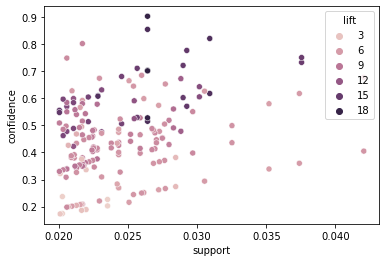

In [22]:
#Visualizing relationship between Support, Confidence and Support
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = "support", y = "confidence", 
                hue = "lift", data = rules)
plt.show()

In [23]:
#analysing rules
actionable_rule = rules[ (rules['lift'] >= 9) & (rules['confidence'] >= 0.6) ]
actionable_rule.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.037551,0.037658,0.026409,0.703281,18.675463,0.024995,3.243278
53,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.037658,0.037551,0.026409,0.701280,18.675463,0.024995,3.221913
49,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029248,0.050032,0.026409,0.902930,18.047007,0.024945,9.786461
50,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.030909,0.051264,0.026409,0.854419,16.666982,0.024824,6.516911
10,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050032,0.037658,0.030909,0.617773,16.404818,0.029024,2.517724
11,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037658,0.050032,0.030909,0.820768,16.404818,0.029024,5.300218
97,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.037551,0.037444,0.022820,0.607703,16.229764,0.021414,2.453643
96,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.037444,0.037551,0.022820,0.609442,16.229764,0.021414,2.464293
19,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.037658,0.051264,0.029248,0.776671,15.150368,0.027317,4.248161
20,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.040176,0.048104,0.028980,0.721333,14.995379,0.027047,3.415896


In [24]:
#further analysis on actionable rules
print('GREEN REGENCY TEACUP AND SAUCER: ', item_list['GREEN REGENCY TEACUP AND SAUCER'].sum())
print('PINK REGENCY TEACUP AND SAUCER: ', item_list['PINK REGENCY TEACUP AND SAUCER'].sum())
print('ROSES REGENCY TEACUP AND SAUCER: ', item_list['ROSES REGENCY TEACUP AND SAUCER'].sum())


GREEN REGENCY TEACUP AND SAUCER:  6296.0
PINK REGENCY TEACUP AND SAUCER:  5035.0
ROSES REGENCY TEACUP AND SAUCER:  8129.0


In [25]:
#rules for the most popular item
most_pop = rules[rules['consequents'].apply(lambda x: 'WHITE HANGING HEART T-LIGHT HOLDER' in x)].sort_values('lift',ascending=False)
most_pop.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
71,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.037712,0.116027,0.025070,0.664773,5.729445,0.020694,2.636935
135,(WOODEN PICTURE FRAME WHITE FINISH),(WHITE HANGING HEART T-LIGHT HOLDER),0.057639,0.116027,0.021641,0.375465,3.235999,0.014954,1.415408
116,(NATURAL SLATE HEART CHALKBOARD),(WHITE HANGING HEART T-LIGHT HOLDER),0.065299,0.116027,0.021963,0.336341,2.898808,0.014386,1.331969
176,(HEART OF WICKER SMALL),(WHITE HANGING HEART T-LIGHT HOLDER),0.062353,0.116027,0.020088,0.322165,2.776628,0.012853,1.304112
175,(PARTY BUNTING),(WHITE HANGING HEART T-LIGHT HOLDER),0.085387,0.116027,0.020249,0.237139,2.043821,0.010341,1.158760


In [26]:
#further analysis on most popular item 
print('WHITE HANGING HEART T-LIGHT HOLDER: ', item_list['WHITE HANGING HEART T-LIGHT HOLDER'].sum())
print('RED HANGING HEART T-LIGHT HOLDER: ', item_list['RED HANGING HEART T-LIGHT HOLDER'].sum())

WHITE HANGING HEART T-LIGHT HOLDER:  35744.0
RED HANGING HEART T-LIGHT HOLDER:  7372.0
